<a href="https://colab.research.google.com/github/Nguyenhaoanhh/Anh-Hao/blob/main/Cifar10_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 [==============================] - 3s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


<function matplotlib.pyplot.show(close=None, block=None)>

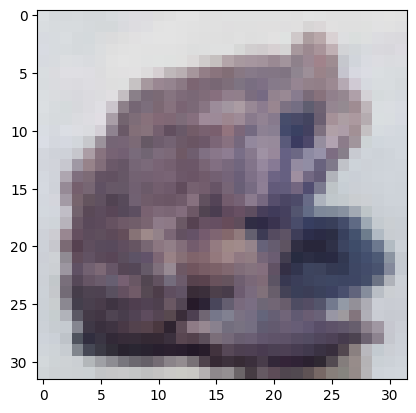

In [1]:
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from  keras.layers import Dense
from keras.utils import to_categorical
from keras.utils.image_utils import load_img
import numpy as np
from tensorflow.keras.utils import img_to_array
from keras.models import load_model

(x_train,y_train),(x_test,y_test) = cifar10.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

digist = x_train[15291]
plt.imshow(digist)
plt.show

In [2]:
model =  Sequential()
model.add(Dense(512,activation = 'relu',input_shape = [32*32*3]))
model.add(Dense(1024,activation = 'relu',input_shape = [32*32*3]))
model.add(Dense(10,activation='softmax'))
model.summary()

x_train = x_train.reshape((50000,32*32*3))
x_train = x_train.astype('float32')/255

x_test = x_test.reshape((10000,32*32*3))
x_test = x_test.astype('float32')/255

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 1024)              525312    
                                                                 
 dense_2 (Dense)             (None, 10)                10250     
                                                                 
Total params: 2,108,938
Trainable params: 2,108,938
Non-trainable params: 0
_________________________________________________________________


In [7]:
#Load Model And Train
model = load_model('/content/cifar10.h5')
model.compile(optimizer = 'rmsprop',loss = 'categorical_crossentropy',metrics = ['Accuracy'])
model.fit(x_train,y_train,epochs = 10,batch_size = 128)
model.save('cifar10.h5')

Epoch 1/10
391/391 [==============================] - 13s 32ms/step - loss: 1.7934 - Accuracy: 0.3589
Epoch 2/10
391/391 [==============================] - 13s 32ms/step - loss: 1.6953 - Accuracy: 0.3936
Epoch 3/10
391/391 [==============================] - 13s 33ms/step - loss: 1.6283 - Accuracy: 0.4168
Epoch 4/10
391/391 [==============================] - 13s 32ms/step - loss: 1.5789 - Accuracy: 0.4352
Epoch 5/10
391/391 [==============================] - 13s 32ms/step - loss: 1.5353 - Accuracy: 0.4507
Epoch 6/10
391/391 [==============================] - 13s 33ms/step - loss: 1.5041 - Accuracy: 0.4633
Epoch 7/10
391/391 [==============================] - 13s 33ms/step - loss: 1.4744 - Accuracy: 0.4737
Epoch 8/10
391/391 [==============================] - 13s 32ms/step - loss: 1.4503 - Accuracy: 0.4837
Epoch 9/10
391/391 [==============================] - 14s 37ms/step - loss: 1.4264 - Accuracy: 0.4926
Epoch 10/10
391/391 [==============================] - 13s 32ms/step - loss: 1.401

In [8]:
test_loss,test_agg = model.evaluate(x_test,y_test)
print('Score: ',test_loss)
print('Score: ',test_agg)

313/313 [==============================] - 2s 5ms/step - loss: 1.5043 - Accuracy: 0.4636
Score:  1.5042535066604614
Score:  0.4636000096797943


1/1 [==============================] - 0s 62ms/step
Output:  3 , bird


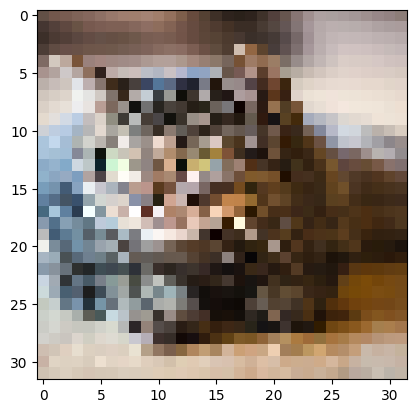

In [9]:
# Test Model
model10=load_model('/content/cifar10.h5')

img = load_img('/content/cat.jpg',target_size=(32,32)) #Cat

plt.imshow(img)
plt.show

img = img_to_array(img)
img = img.reshape(1,32*32*3)
img = img.astype('float32')
img = img/255
c = ['airplane','automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
kq = np.argmax(model10.predict(img))
#print(kq,type(kq))
print('Output: ',kq,',',c[kq-1])